In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# Data loading

df = pd.read_csv('/content/hotel_bookings.csv')

In [4]:
# Initial Tasks:

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [6]:
df.shape

(119390, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# Task 1. Data Cleaning: Handling missing values, correcting data types, and removing duplicates.

# Showing which columns have missing values, starting with the ones that have the most

df.isnull().sum().sort_values(ascending=False)

,0
company,112593
agent,16340
country,488
children,4
arrival_date_month,0
arrival_date_week_number,0
hotel,0
is_canceled,0
stays_in_weekend_nights,0
arrival_date_day_of_month,0


In [9]:
# Total null values in the data

df.isnull().sum().sum()

np.int64(129425)

In [10]:
lst = df.columns.tolist()
lst

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [14]:
# Fill missing numerical values

df['children'].fillna(0, inplace = True)

# Fill categorical missing values

df['country'].fillna('Unknown', inplace = True)

# Fill agent and company with 0 and convert to integer

df['agent'].fillna(0, inplace = True)
df['agent'] = df['agent'].astype(int)

df['company'].fillna(0, inplace = True)
df['company'] = df['company'].astype(int)

# Convert data types
df['reservatiton_status_date'] = pd.to_datetime(df['reservation_status_date'])

/tmp/ipython-input-14-4080044951.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace = True)
/tmp/ipython-input-14-4080044951.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [15]:
df.isnull().sum().sort_values(ascending=False)

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [16]:
# Check and drop duplicates
df.drop_duplicates(inplace=True)

In [17]:
#  2. Descriptive Statistics: Generating summary statistics for numerical and categorical variables.

# Numerical Data summary
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservatiton_status_date
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,...,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,...,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567,2016-08-31 03:44:08.963339520
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000,2016-03-18 00:00:00
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000,2016-09-08 00:00:00
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000,2017-03-05 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,...,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946,NaN


In [18]:
# Categorical summary
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396
unique,2,12,5,178,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2/14/2016
freq,53428,11257,67978,27453,51618,69141,56552,46313,86251,71986,63371,211


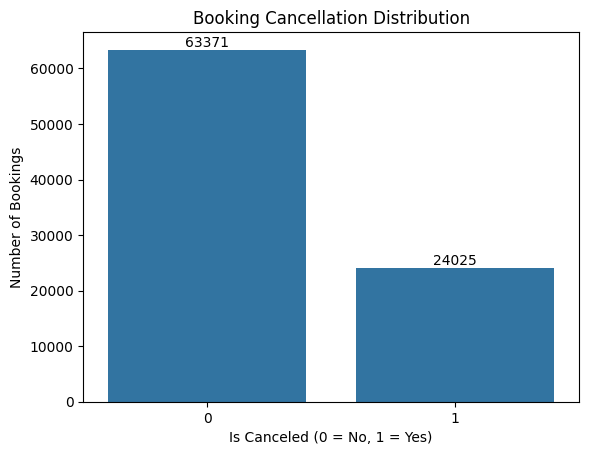

In [19]:
# 3. Data Visualization: Creating visualizations to understand the distribution of variables and relationships between them.

# 3.1 :- Booking Cancellation Distribution
ax = sns.countplot(data=df, x='is_canceled')
plt.title('Booking Cancellation Distribution')
plt.xlabel('Is Canceled (0 = No, 1 = Yes)')
plt.ylabel('Number of Bookings')

for i in ax.containers:
  plt.bar_label(i)

plt.show()

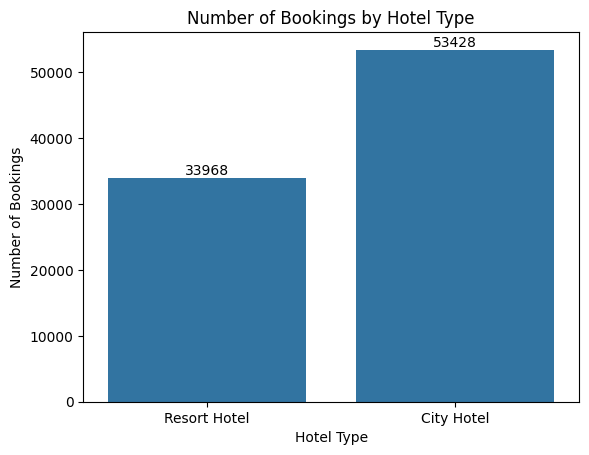

In [20]:
# 3.2 Bookings Per Hotel Type

ax = sns.countplot(data=df, x='hotel')
plt.title('Number of Bookings by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')

for i in ax.containers:
    plt.bar_label(i)

plt.show()


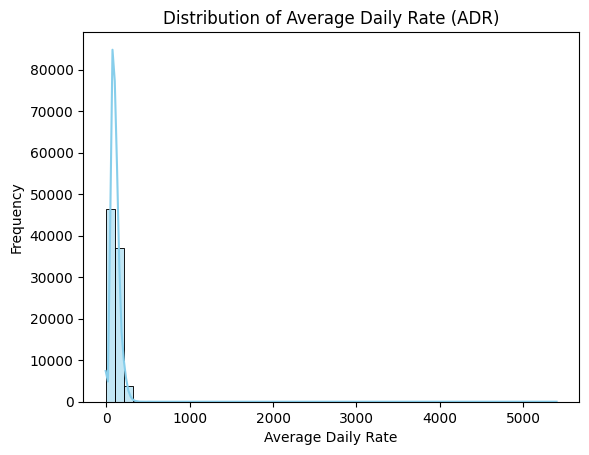

In [21]:
# 3.3 Distribution of Average Daily Rate (ADR)

sns.histplot(data=df, x='adr', bins=50, kde=True, color='skyblue')
plt.title('Distribution of Average Daily Rate (ADR)')
plt.xlabel('Average Daily Rate')
plt.ylabel('Frequency')
plt.show()

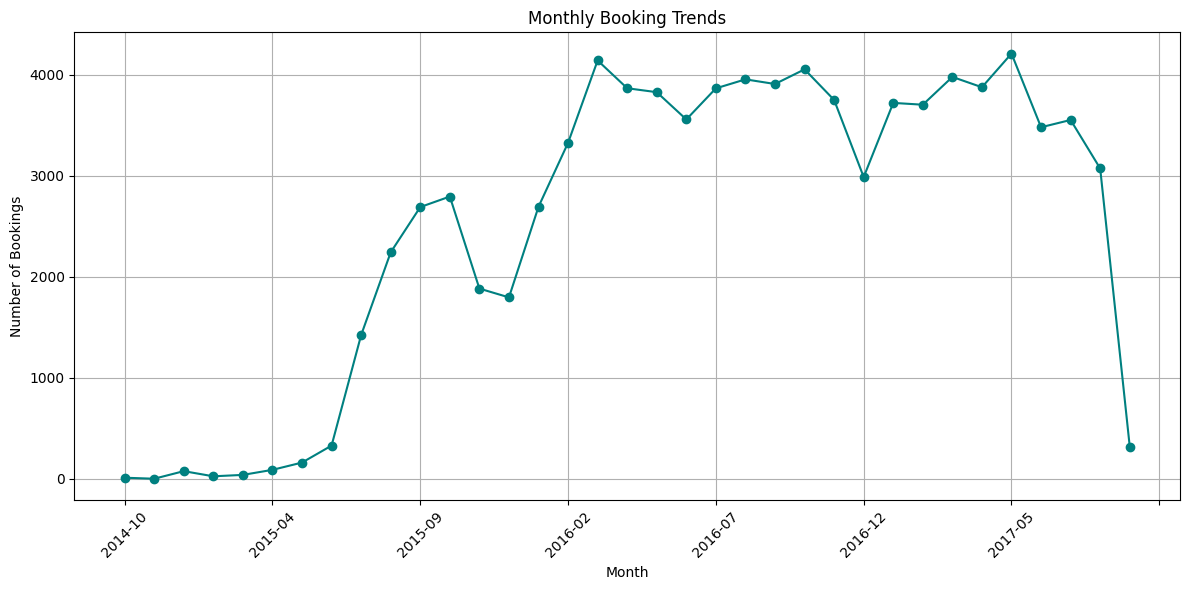

In [22]:
#  3.4 Booking Trends Over Time

# Ensure the date column is in datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Now extract the month and count bookings
monthly_bookings = df['reservation_status_date'].dt.to_period('M').astype(str).value_counts().sort_index()

# Plot the trend
monthly_bookings.plot(kind='line', figsize=(12,6), marker='o', color='teal')
plt.title('Monthly Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

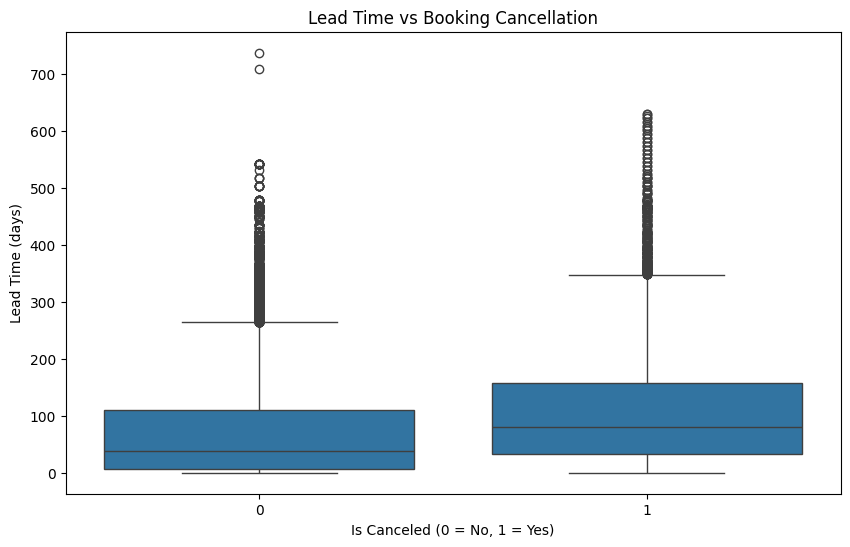

In [23]:
# 3.5 Lead Time vs. Booking Cancellation

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='is_canceled', y='lead_time')
plt.title('Lead Time vs Booking Cancellation')
plt.xlabel('Is Canceled (0 = No, 1 = Yes)')
plt.ylabel('Lead Time (days)')
plt.show()

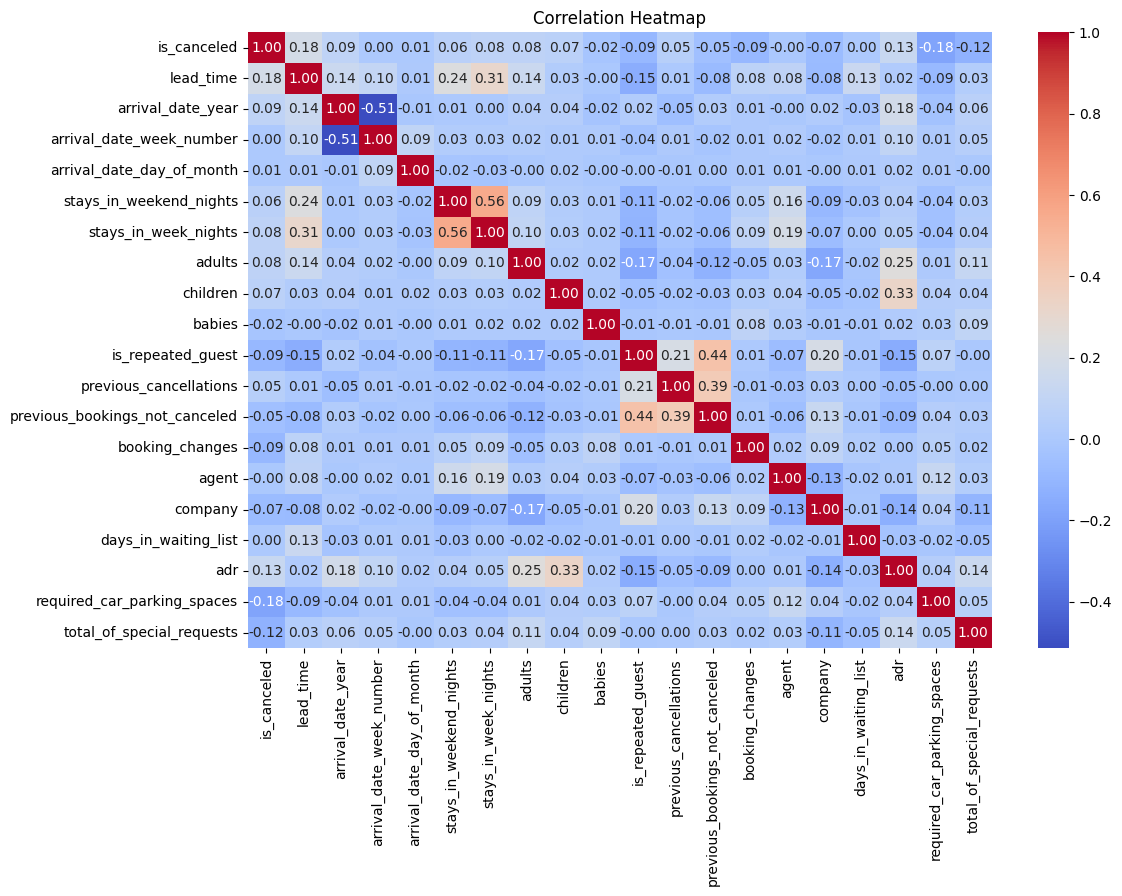

In [24]:
# 3.6 Correlation Heatmap

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [25]:
# 4. Time Series Analysis: Analyzing trends and patterns over time.

In [26]:
# Combine year and month into datetime format (first of each month)
df['year_month'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-01')

# Count monthly bookings
df.groupby('year_month').size().sort_index()

,0
year_month,
2015-07-01,1674
2015-08-01,2453
2015-09-01,2839
2015-10-01,2700
2015-11-01,1665
2015-12-01,1982
2016-01-01,1849
2016-02-01,2806
2016-03-01,3831


In [27]:
# Filter canceled bookings and count per month
df[df['is_canceled'] == 1].groupby('year_month').size().sort_index()


,0
year_month,
2015-07-01,512
2015-08-01,571
2015-09-01,566
2015-10-01,440
2015-11-01,243
2015-12-01,372
2016-01-01,301
2016-02-01,528
2016-03-01,886


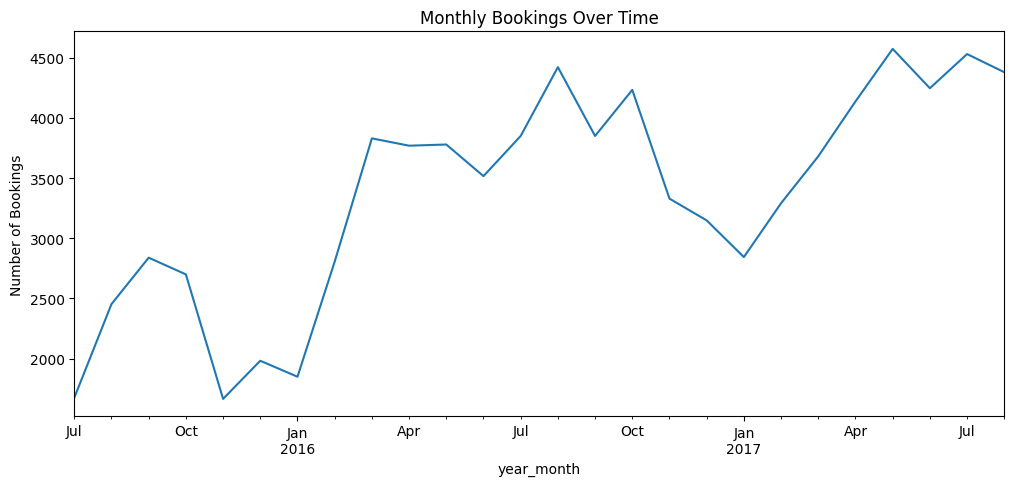

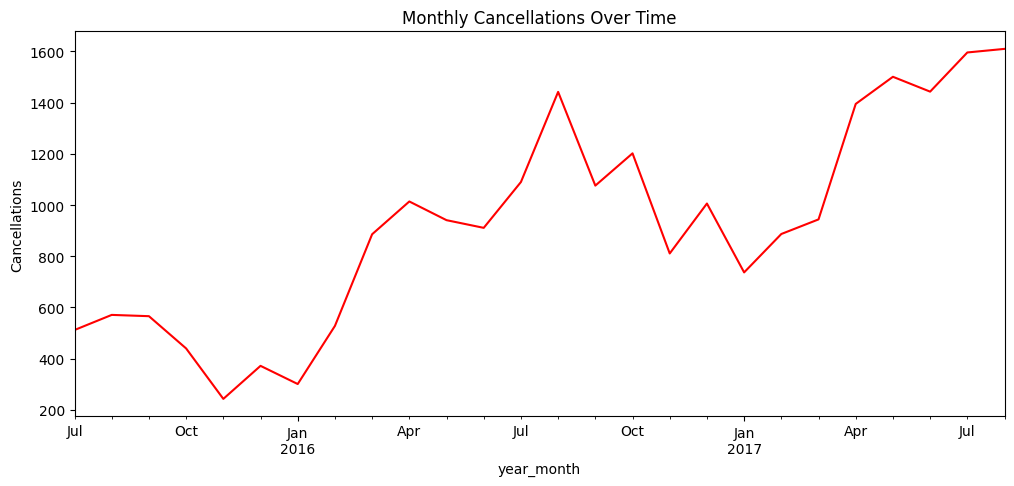

In [28]:
# Combine year and month for timeline
df['year_month'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-01')

# Monthly bookings
monthly_bookings = df.groupby('year_month').size()
monthly_bookings.plot(figsize=(12,5), title="Monthly Bookings Over Time")
plt.ylabel("Number of Bookings")
plt.show()

# Monthly cancellations
df[df['is_canceled'] == 1].groupby('year_month').size().plot(figsize=(12,5), title="Monthly Cancellations Over Time", color='red')
plt.ylabel("Cancellations")
plt.show()


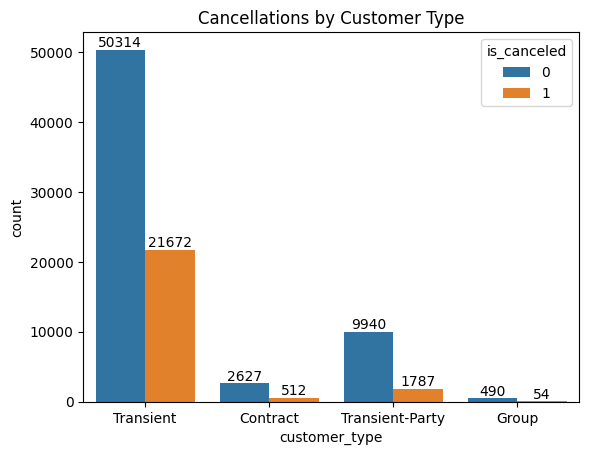

,is_canceled
customer_type,
Contract,0.163109
Group,0.099265
Transient,0.301059
Transient-Party,0.152383


In [29]:
#  5. Segmentation Analysis: Identifying and analyzing different customer segments.

# Customer Type

ax = sns.countplot(data=df, x='customer_type', hue = 'is_canceled')
plt.title("Cancellations by Customer Type")

for i in ax.containers:
  plt.bar_label(i)

plt.show()

# Get counts of each combination of customer_type and is_canceled

df.groupby('customer_type')['is_canceled'].mean()


In [30]:
repeated = df[df['is_repeated_guest'] == 1]
non_repeated = df[df['is_repeated_guest'] == 0]

print("Repeated Guest Cancellation Rate:", repeated['is_canceled'].mean())
print("Non-Repeated Guest Cancellation Rate:", non_repeated['is_canceled'].mean())

Repeated Guest Cancellation Rate: 0.07642752562225476
Non-Repeated Guest Cancellation Rate: 0.28296876674485893


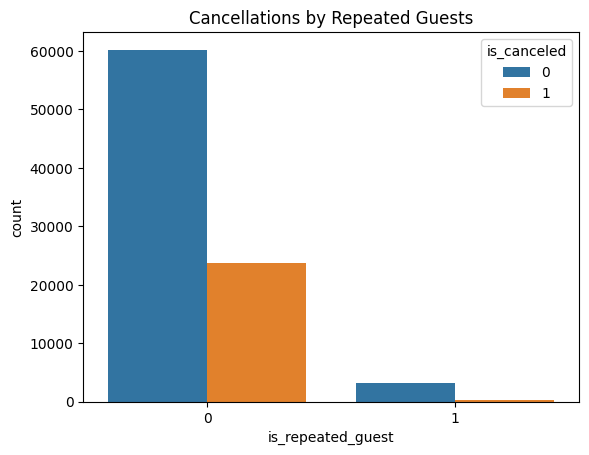

,is_canceled
is_repeated_guest,
0,0.282969
1,0.076428


In [31]:
# Repeated Guests

sns.countplot(data=df, x='is_repeated_guest', hue = 'is_canceled')
plt.title("Cancellations by Repeated Guests")
plt.show()

df.groupby('is_repeated_guest')['is_canceled'].mean()

In [32]:
# 6. Booking and Cancellation Analysis: Examining booking attributes and their impact on cancellations and ADR.

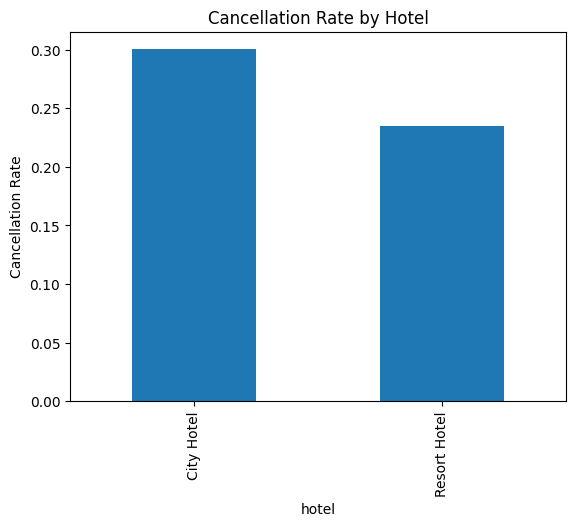

,is_canceled
hotel,
City Hotel,0.300386
Resort Hotel,0.234809


In [33]:
# Cancellations by Hotel:

df.groupby('hotel')['is_canceled'].mean().plot(kind='bar')
plt.title("Cancellation Rate by Hotel")
plt.ylabel("Cancellation Rate")
plt.show()

df.groupby('hotel')['is_canceled'].mean()

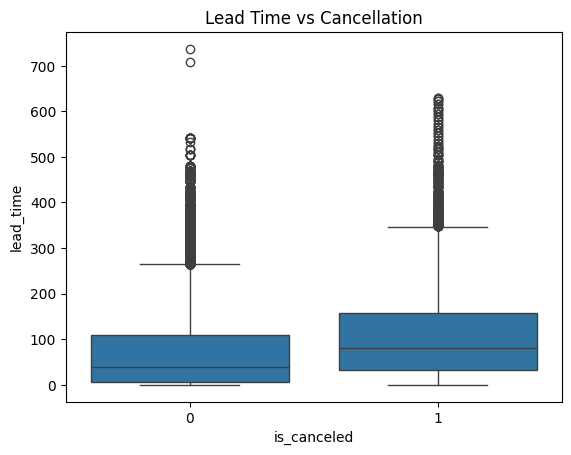

,count,mean,std,min,25%,50%,75%,max
is_canceled,,,,,,,,
0,63371.0,70.099588,81.629723,0.0,7.0,38.0,110.0,737.0
1,24025.0,105.719251,91.877339,0.0,32.0,80.0,158.0,629.0


In [34]:
# Lead Time Impact:

sns.boxplot(data=df, x='is_canceled', y='lead_time')
plt.title("Lead Time vs Cancellation")
plt.show()

df.groupby('is_canceled')['lead_time'].describe()

# df.groupby('is_canceled')['lead_time'].mean()

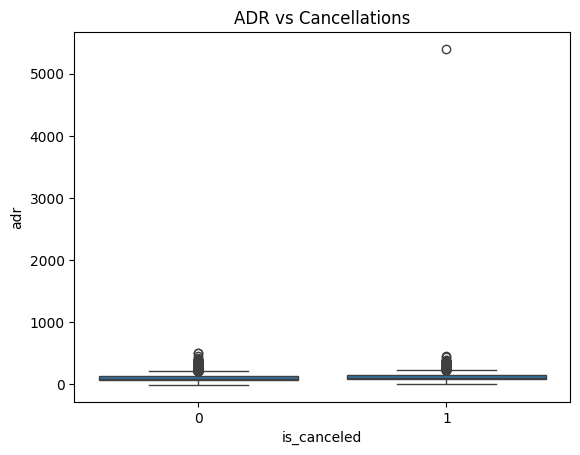

,count,mean,std,min,25%,50%,75%,max
is_canceled,,,,,,,,
0,63371.0,102.001961,51.393422,-6.38,67.99,94.5,129.2,510.0
1,24025.0,117.772476,62.149188,0.00,81.00,109.8,144.0,5400.0


In [35]:
# ADR vs Cancellations

sns.boxplot(data=df, x='is_canceled', y='adr')
plt.title("ADR vs Cancellations")
plt.show()

# Summary statistics of ADR grouped by cancellation status
df.groupby('is_canceled')['adr'].describe()


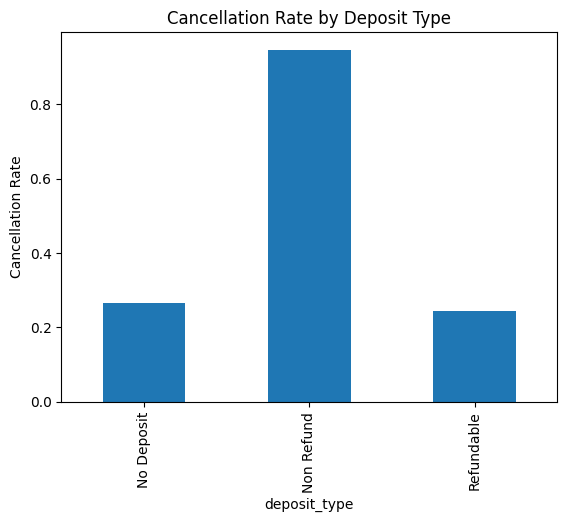

,is_canceled
deposit_type,
No Deposit,0.266849
Non Refund,0.947013
Refundable,0.242991


In [37]:
# Deposit Type Impact

df.groupby('deposit_type')['is_canceled'].mean().plot(kind='bar')
plt.title("Cancellation Rate by Deposit Type")
plt.ylabel("Cancellation Rate")
plt.show()

df.groupby('deposit_type')['is_canceled'].mean()

In [39]:
# 7. Actionable Insights: Providing recommendations based on the analysis to improve hotel operations and customer satisfaction.

print("Cancellation rate by hotel:\n", df.groupby('hotel')['is_canceled'].mean())
print("\nAverage ADR by hotel:\n", df.groupby('hotel')['adr'].mean())
print("\nCancellation rate by deposit type:\n", df.groupby('deposit_type')['is_canceled'].mean())
print("\nAverage special requests by customer type:\n", df.groupby('customer_type')['total_of_special_requests'].mean())


Cancellation rate by hotel:
 hotel
City Hotel      0.300386
Resort Hotel    0.234809
Name: is_canceled, dtype: float64

Average ADR by hotel:
 hotel
City Hotel      110.985944
Resort Hotel     99.025346
Name: adr, dtype: float64

Cancellation rate by deposit type:
 deposit_type
No Deposit    0.266849
Non Refund    0.947013
Refundable    0.242991
Name: is_canceled, dtype: float64

Average special requests by customer type:
 customer_type
Contract           0.838484
Group              0.645221
Transient          0.732073
Transient-Party    0.457918
Name: total_of_special_requests, dtype: float64


In [40]:
df.groupby('hotel')['is_canceled'].mean()

,is_canceled
hotel,
City Hotel,0.300386
Resort Hotel,0.234809


In [41]:
df.groupby('hotel')['adr'].mean()

,adr
hotel,
City Hotel,110.985944
Resort Hotel,99.025346


In [42]:
# Total special requests by customer_type
c1 = df.groupby('customer_type')['total_of_special_requests'].sum()

# Special requests by customer_type where booking was canceled
c2 = df[df['is_canceled'] == 1].groupby('customer_type')['total_of_special_requests'].sum()

# Combine both into a DataFrame
summary = pd.concat([c1, c2], axis=1)
summary.columns = ['Total_Requests', 'Canceled_Requests']

# Fill NaNs (in case a customer_type has 0 cancellations)
summary['Canceled_Requests'] = summary['Canceled_Requests'].fillna(0).astype(int)

# Calculate percentage
summary['Canceled_Request_%'] = (summary['Canceled_Requests'] / summary['Total_Requests'] * 100).round(2)

summary

,Total_Requests,Canceled_Requests,Canceled_Request_%
customer_type,,,
Contract,2632,447,16.98
Group,351,18,5.13
Transient,52699,11994,22.76
Transient-Party,5370,411,7.65


In [43]:
df.groupby('deposit_type')['is_canceled'].mean()

,is_canceled
deposit_type,
No Deposit,0.266849
Non Refund,0.947013
Refundable,0.242991


In [44]:
df.groupby('customer_type')['total_of_special_requests'].mean()

,total_of_special_requests
customer_type,
Contract,0.838484
Group,0.645221
Transient,0.732073
Transient-Party,0.457918


In [43]:
-----------------################### Objective Questions ###################-----------------

In [46]:
# 1. What is the average lead time for bookings that are cancelled versus those that are not cancelled?

avg_lead_time_canceled = df[df['is_canceled'] == 1]['lead_time'].mean()
avg_lead_time_not_canceled = df[df['is_canceled'] == 0]['lead_time'].mean()
print("Average lead time for canceled bookings:", avg_lead_time_canceled)
print("Average lead time for non-canceled bookings:", avg_lead_time_not_canceled)

Average lead time for canceled bookings: 105.71925078043705
Average lead time for non-canceled bookings: 70.09958813968535


In [47]:
df.groupby('is_canceled')['lead_time'].mean()

,lead_time
is_canceled,
0,70.099588
1,105.719251


In [49]:
# 2. Which month has the highest number of bookings?

# bookings_by_month = df.groupby(df['arrival_date_month']).size()
# highest_bookings_month = bookings_by_month.idxmax()
# print("Month with the highest number of bookings:", highest_bookings_month)

df['arrival_date_month'].value_counts().idxmax()


'August'

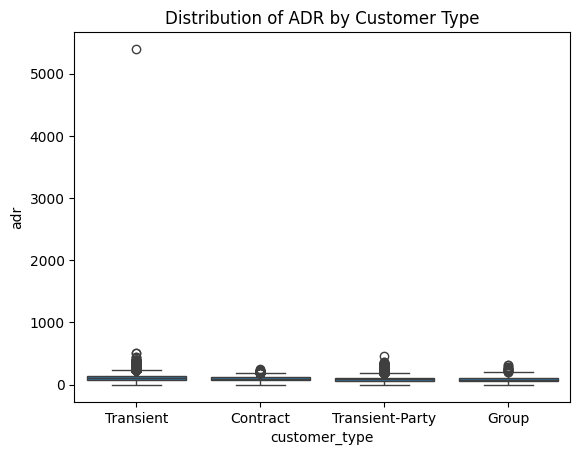

,count,mean,std,min,25%,50%,75%,max
customer_type,,,,,,,,
Contract,3139.0,92.753036,35.095893,0.00,68.0,90.90,113.6700,250.0
Group,544.0,84.361949,51.449532,0.00,50.0,75.00,110.4675,318.0
Transient,71986.0,110.135859,56.613558,0.00,75.0,102.00,139.2800,5400.0
Transient-Party,11727.0,87.675056,43.821641,-6.38,62.0,81.28,109.0000,451.5


In [50]:
# 3. What is the distribution of ADR (Average Daily Rate) across different customer types?

sns.boxplot(data=df, x='customer_type', y='adr')
plt.title("Distribution of ADR by Customer Type")
plt.show()

df.groupby('customer_type')['adr'].describe()

In [51]:
# 4. How many bookings had special requests, and what is the average number of special requests per booking?

# Count of bookings with any special request
(df['total_of_special_requests'] > 0).sum()

# Average number of special requests per booking
df['total_of_special_requests'].mean()


np.float64(0.6985674401574443)

In [52]:
# 5. What is the cancellation rate for each market segment?

# Cancellation rate for each market segment
df.groupby('market_segment')['is_canceled'].mean()

,is_canceled
market_segment,
Aviation,0.198238
Complementary,0.125356
Corporate,0.121083
Direct,0.147154
Groups,0.270134
Offline TA/TO,0.148535
Online TA,0.353462
Undefined,1.000000


In [53]:
# 6. Which distribution channel has the highest average ADR?

df.groupby('distribution_channel')['adr'].mean().idxmax()

'GDS'

In [54]:
# 7. What is the correlation between lead time and the length of stay?

df['length_of_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df['lead_time'].corr(df['length_of_stay'])

np.float64(0.31827157953643465)

In [55]:
# 8. How many bookings include children and/or babies?

int(((df['children'] > 0) | (df['babies'] > 0)).sum())

9103

In [56]:
# 9. What is the average lead time for repeated guests compared to new guests?

df.groupby('is_repeated_guest')['lead_time'].mean()

,lead_time
is_repeated_guest,
0,82.442255
1,17.160469


In [57]:
# 10. What is the most common combination of reserved room type and assigned room type?

df.groupby(['reserved_room_type', 'assigned_room_type']).size().idxmax()

('A', 'A')

In [ ]:
-----------------################### Subjective Questions ###################-----------------

Average Lead Time:
 is_canceled
0     70.099588
1    105.719251
Name: lead_time, dtype: float64


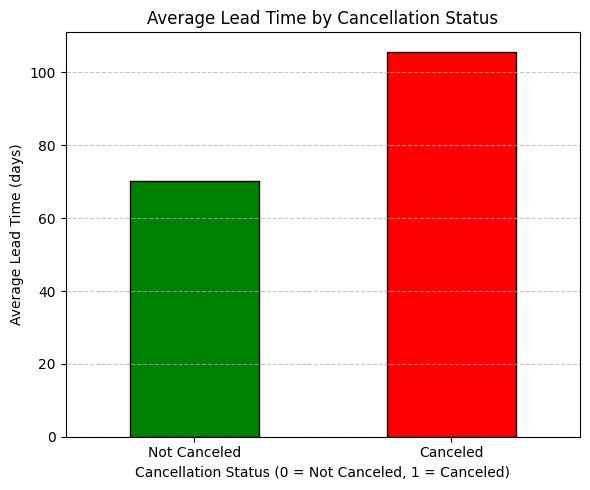

,lead_time
is_canceled,
0,70.099588
1,105.719251


In [58]:
# 1. How does the lead time affect the likelihood of booking cancellations?

#Calculate Average Lead Time by Cancellation Status

lead_time_by_cancellation = df.groupby('is_canceled')['lead_time'].mean()
print("Average Lead Time:\n", lead_time_by_cancellation)


plt.figure(figsize=(6, 5))
lead_time_by_cancellation.plot(kind='bar', color=['green', 'red'], edgecolor='black')
plt.title('Average Lead Time by Cancellation Status')
plt.xlabel('Cancellation Status (0 = Not Canceled, 1 = Canceled)')
plt.ylabel('Average Lead Time (days)')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

df.groupby('is_canceled')['lead_time'].mean()


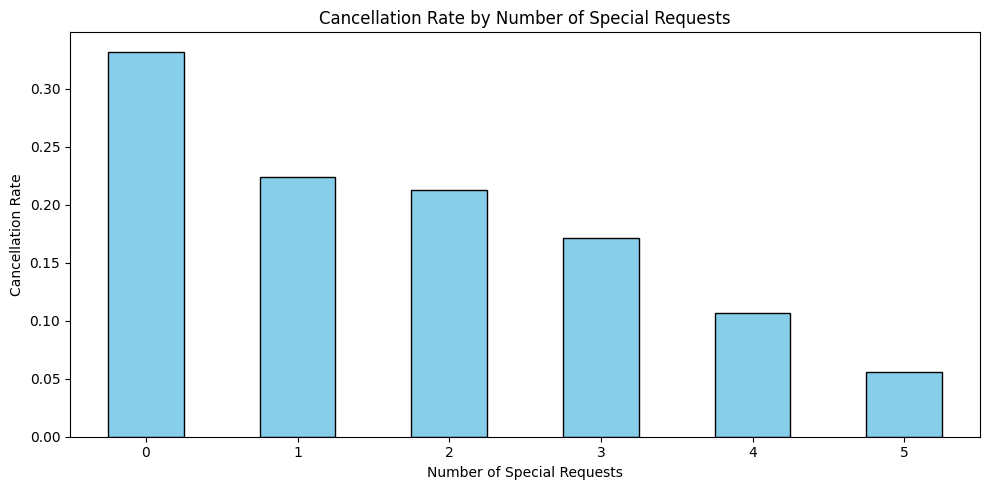

,is_canceled
total_of_special_requests,
0,0.332027
1,0.224110
2,0.212919
3,0.171342
4,0.106250
5,0.055556


In [59]:
# 2. What impact do special requests have on booking cancellations?

# Group by number of special requests and calculate cancellation rate
cancellation_by_requests = df.groupby('total_of_special_requests')['is_canceled'].mean()
cancellation_by_requests

# Plot the result
plt.figure(figsize=(10, 5))
cancellation_by_requests.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cancellation Rate by Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Group by number of special requests and calculate cancellation rate
df.groupby('total_of_special_requests')['is_canceled'].mean()


In [60]:
# 3. What trends can be observed in the booking behavior of international guests compared to domestic guests?

df['guest_origin'] = df['country'].apply(lambda x: 'Domestic' if x == 'PRT' else 'International')

# Group by guest origin and calculate key statistics
guest_comparison = df.groupby('guest_origin').agg({
    'is_canceled': 'mean',
    'lead_time': 'mean',
    'adr': 'mean',
    'stays_in_week_nights': 'mean',
    'stays_in_weekend_nights': 'mean',
    'total_of_special_requests': 'mean'
})

# Calculate total stay duration
guest_comparison['avg_total_stay'] = guest_comparison['stays_in_week_nights'] + guest_comparison['stays_in_weekend_nights']

# Display DataFrame (no print)
guest_comparison


,is_canceled,lead_time,adr,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests,avg_total_stay
guest_origin,,,,,,,
Domestic,0.356646,65.101228,95.839512,2.272575,0.815794,0.594252,3.088369
International,0.237459,86.665032,111.145052,2.786981,1.092037,0.746342,3.879018


In [61]:
# 4. What is the impact of the day of the week on booking cancellations?

# Create a datetime column if not already present
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                    df['arrival_date_month'] + '-' +
                                    df['arrival_date_day_of_month'].astype(str))

# Extract day of the week (Monday=0, Sunday=6)
df['arrival_day_of_week'] = df['arrival_date'].dt.day_name()

# Calculate cancellation rate by day of the week
cancellation_by_day = df.groupby('arrival_day_of_week')['is_canceled'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Display cancellation rates
cancellation_by_day


,is_canceled
arrival_day_of_week,
Monday,0.267509
Tuesday,0.243209
Wednesday,0.255138
Thursday,0.277401
Friday,0.305381
Saturday,0.300953
Sunday,0.265802


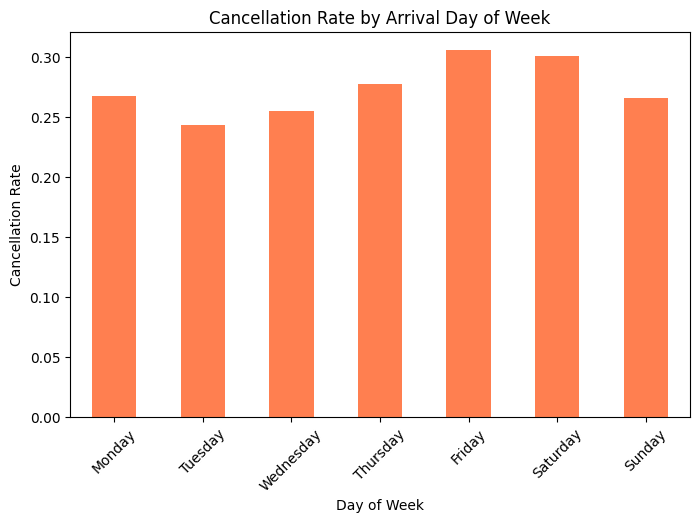

In [ ]:
#plot

cancellation_by_day.plot(kind='bar', figsize=(8,5), color='coral', title='Cancellation Rate by Arrival Day of Week')
plt.ylabel('Cancellation Rate')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.show()


In [62]:
# 5. What are the most common countries for international guests, and how do their booking patterns compare to domestic guests?

# Create guest_origin column if not present
df['guest_origin'] = df['country'].apply(lambda x: 'Domestic' if x == 'PRT' else 'International')

# Filter international guests
international_guests = df[df['guest_origin'] == 'International']

# Count bookings by country and get top 10
top_countries = international_guests['country'].value_counts().head(10)
top_countries



,count
country,
GBR,10433
FRA,8837
ESP,7252
DEU,5387
ITA,3066
IRL,3016
BEL,2081
BRA,1995
NLD,1911


In [63]:
booking_patterns = df.groupby('guest_origin').agg({
    'is_canceled': 'mean',               # Cancellation rate
    'lead_time': 'mean',                 # Average lead time
    'adr': 'mean',                      # Average daily rate
    'length_of_stay': 'mean',           # Average length of stay
    'total_of_special_requests': 'mean' # Average special requests
}).reset_index()

booking_patterns

,guest_origin,is_canceled,lead_time,adr,length_of_stay,total_of_special_requests
0,Domestic,0.356646,65.101228,95.839512,3.088369,0.594252
1,International,0.237459,86.665032,111.145052,3.879018,0.746342


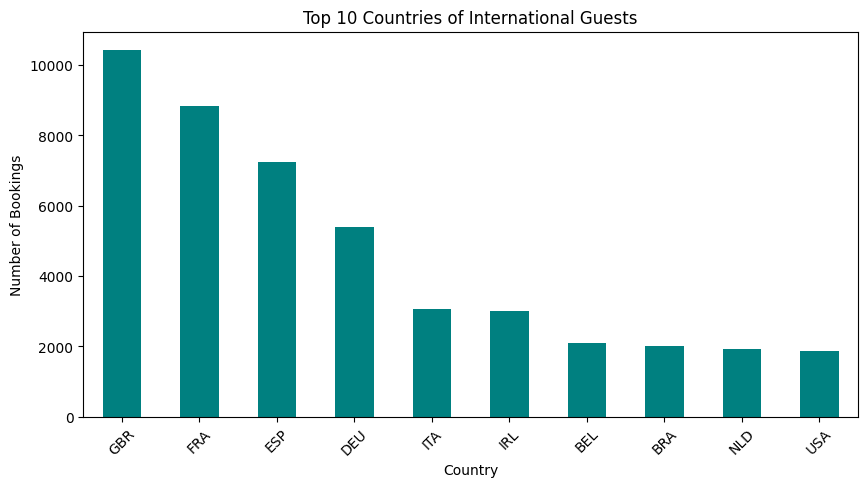

In [ ]:
#plot

top_countries.plot(kind='bar', figsize=(10,5), color='teal', title='Top 10 Countries of International Guests')
plt.ylabel('Number of Bookings')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df['country'].value_counts().head()

,count
country,
PRT,27453
GBR,10433
FRA,8837
ESP,7252
DEU,5387
